<div style="text-align: center;">
  
# 🧁 Limpeza e tratamento de dados de CGM (monitoramento contínuo de glicemia)

</div>

## 1. Carregando as bibliotecas

In [ ]:
#%pip install missingno

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np;

## 2. Extraindo e visualizando o dataframe; padronizando os nomes das variáveis

In [243]:
# Dataset extraído pelo RStudio através do repositório 
# https://rdrr.io/github/personalscience/psi-shiny-cgm/man/sample_libreview_df.html
df_raw = pd.read_csv('./sample_libreview_df_raw.csv')
df_raw

,Unnamed: 0,time,scan,hist,strip,value,food,user_id
0,1,2021-05-30 16:59:00,NaN,69.0,NaN,69.0,NaN,1234
1,2,2021-05-30 17:14:00,NaN,66.0,NaN,66.0,NaN,1234
2,3,2021-05-30 17:30:00,NaN,62.0,NaN,62.0,NaN,1234
3,4,2021-05-30 17:45:00,NaN,60.0,NaN,60.0,NaN,1234
4,5,2021-05-30 18:00:00,NaN,62.0,NaN,62.0,NaN,1234
...,...,...,...,...,...,...,...,...
3979,3980,2021-07-12 19:27:00,NaN,NaN,NaN,NaN,NaN,1234
3980,3981,2021-07-13 11:25:00,NaN,NaN,NaN,NaN,NaN,1234
3981,3982,2021-07-15 14:17:00,NaN,NaN,NaN,NaN,NaN,1234
3982,3983,2021-07-16 09:31:00,NaN,NaN,NaN,NaN,NaN,1234


In [244]:
'''
No atributo columns (do tipo índice) do objeto df_raw, nosso dataframe, iremos formatar
todos os seus elementos, isto é, os nomes das colunas. Para isso, utilizamos o acessor .str, 
que nos permite aplicar métodos de strings para todos os elementos do índice/vetor.
Os métodos utilizados são: 
- lower(): torna todos os caracteres minúsculos;
- strip(): remove espaços em branco das extremidades da string;
- replace(,): substituímos o elemento da esquerda, sempre que ele aparecer, pelo da 
direita. No nosso caso, trocamos um espaço em branco por nenhum espaço, e ":" por nenhum espaço.
'''

df_raw.columns = df_raw.columns.str.lower().str.strip().str.replace(' ', '').str.replace(':', '')
df_raw

,unnamed0,time,scan,hist,strip,value,food,user_id
0,1,2021-05-30 16:59:00,NaN,69.0,NaN,69.0,NaN,1234
1,2,2021-05-30 17:14:00,NaN,66.0,NaN,66.0,NaN,1234
2,3,2021-05-30 17:30:00,NaN,62.0,NaN,62.0,NaN,1234
3,4,2021-05-30 17:45:00,NaN,60.0,NaN,60.0,NaN,1234
4,5,2021-05-30 18:00:00,NaN,62.0,NaN,62.0,NaN,1234
...,...,...,...,...,...,...,...,...
3979,3980,2021-07-12 19:27:00,NaN,NaN,NaN,NaN,NaN,1234
3980,3981,2021-07-13 11:25:00,NaN,NaN,NaN,NaN,NaN,1234
3981,3982,2021-07-15 14:17:00,NaN,NaN,NaN,NaN,NaN,1234
3982,3983,2021-07-16 09:31:00,NaN,NaN,NaN,NaN,NaN,1234


## 3. Excluindo variáveis desnecessárias e cuidando de linhas duplicadas e tipos de dados

In [245]:
# Retirando linhas duplicadas e formatamos o tipo de dados

df_raw.drop_duplicates(inplace=True) # com inplace = True, o objeto df_raw já é substituído
                                     # pelo novo dataframe sem as duplicatas, ao invés de
                                     # ser feita uma cópia com as alterações (inplace = False)
df_raw['time'] = pd.to_datetime(df_raw['time'], errors = 'coerce') # convertemos a coluna 'time' para o tipo datetime
df_raw['value'] = pd.to_numeric(df_raw['value'], errors = 'coerce') # a coluna 'value' se torna numérica

# OBS: errors = 'coerce' faz com que elementos que não estejam num formato válido para
# serem convertidos para datetime retornem NaT, e os que não possam ser convertidos para
# int ou float (numérico) retornem NaN.

df_raw


,unnamed0,time,scan,hist,strip,value,food,user_id
0,1,2021-05-30 16:59:00,NaN,69.0,NaN,69.0,NaN,1234
1,2,2021-05-30 17:14:00,NaN,66.0,NaN,66.0,NaN,1234
2,3,2021-05-30 17:30:00,NaN,62.0,NaN,62.0,NaN,1234
3,4,2021-05-30 17:45:00,NaN,60.0,NaN,60.0,NaN,1234
4,5,2021-05-30 18:00:00,NaN,62.0,NaN,62.0,NaN,1234
...,...,...,...,...,...,...,...,...
3979,3980,2021-07-12 19:27:00,NaN,NaN,NaN,NaN,NaN,1234
3980,3981,2021-07-13 11:25:00,NaN,NaN,NaN,NaN,NaN,1234
3981,3982,2021-07-15 14:17:00,NaN,NaN,NaN,NaN,NaN,1234
3982,3983,2021-07-16 09:31:00,NaN,NaN,NaN,NaN,NaN,1234


In [246]:
# A coluna 'unnamed0' faz a contagem das linhas, o que um dataframe do python já recebe automaticamente,
# por isso, iremos excluí-la. De restante, iremos trabalhar apenas com 'time' e 'value', portanto, as demais
# variáveis também serão deletadas.

df_raw = df_raw.drop(columns=['unnamed0', 'strip', 'hist', 'scan', 'food', 'user_id'])
df_raw

,time,value
0,2021-05-30 16:59:00,69.0
1,2021-05-30 17:14:00,66.0
2,2021-05-30 17:30:00,62.0
3,2021-05-30 17:45:00,60.0
4,2021-05-30 18:00:00,62.0
...,...,...
3979,2021-07-12 19:27:00,NaN
3980,2021-07-13 11:25:00,NaN
3981,2021-07-15 14:17:00,NaN
3982,2021-07-16 09:31:00,NaN


## 4. Eliminando os valores nulos e absurdos

In [247]:
# Visualizar o dataframe df_raw nas posições em que as linhas de 'value' não têm valores computados (NaN). 
# Percebemos que a ausência de valores ocorre da posição 3562 em diante do dataframe.

df_raw[df_raw['value'].isnull()]

,time,value
3562,2021-05-30 16:58:00,NaN
3563,2021-05-30 17:02:00,NaN
3564,2021-05-30 17:14:00,NaN
3565,2021-05-30 17:42:00,NaN
3566,2021-05-30 18:55:00,NaN
...,...,...
3979,2021-07-12 19:27:00,NaN
3980,2021-07-13 11:25:00,NaN
3981,2021-07-15 14:17:00,NaN
3982,2021-07-16 09:31:00,NaN


In [248]:
# Contagem de quantos valores nulos (NaN ou NaT) temos em cada coluna de df_raw
# df_raw.isnull() retorna um dataframe com True e False em cada célula. True, se a célula tem
# valor NaN ou NaT, e False em caso contrário. O método sum(axis = 0) soma a quantidade de cada coluna.
# Como True corresponde ao valor 1 e False a 0, teremos assim a soma dos valores nulos.

print('Valores nulos antes: \n')
print(df_raw.isnull().sum(axis = 0))

Valores nulos antes: 

time       1
value    422
dtype: int64


In [249]:
# Excluindo as linhas com valores nulos em 'value' e 'time'.

df_raw = df_raw.dropna(subset=['value','time'])
df_raw

,time,value
0,2021-05-30 16:59:00,69.0
1,2021-05-30 17:14:00,66.0
2,2021-05-30 17:30:00,62.0
3,2021-05-30 17:45:00,60.0
4,2021-05-30 18:00:00,62.0
...,...,...
3557,2021-07-20 06:40:00,79.0
3558,2021-07-20 06:55:00,77.0
3559,2021-07-20 07:10:00,80.0
3560,2021-07-20 07:25:00,83.0


In [250]:
print('Valores nulos depois: \n')
print(df_raw.isnull().sum())

Valores nulos depois: 

time     0
value    0
dtype: int64


In [251]:
# Deixamos em df_gcm apenas valores computados pelo Libre, para evitar erros de medições que atrapalhem 
# a obtenção de estatísticas úteis.

df_cgm = df_raw[(df_raw['value'] > 0) & (df_raw['value'] < 500)]

## 5. Granulação de 'time' em 'date', 'hour', 'hour_minute', 'weekday' e 'hour_cont'

In [252]:
df_cgm['time'] = pd.to_datetime(df_cgm['time'])
df_cgm['date'] = df_cgm['time'].dt.date 

# valor inteiro das horas, para representações diretas
df_cgm['hour'] = df_cgm['time'].dt.hour

df_cgm['hour_minute'] = df_cgm['time'].dt.strftime('%H:%M')
df_cgm['weekday'] = df_cgm['time'].dt.day_name()

# horas com fração decimal, para usar em modelos estatísticos
df_cgm['hour_cont'] = (df_cgm['time'].dt.hour + df_cgm['time'].dt.minute / 60).round(2)


## 6. Organização final da tabela

In [253]:
df_cgm = df_cgm[['time', 'date', 'hour_minute', 'value', 'weekday', 'hour', 'hour_cont']]
df_cgm

,time,date,hour_minute,value,weekday,hour,hour_cont
0,2021-05-30 16:59:00,2021-05-30,16:59,69.0,Sunday,16,16.98
1,2021-05-30 17:14:00,2021-05-30,17:14,66.0,Sunday,17,17.23
2,2021-05-30 17:30:00,2021-05-30,17:30,62.0,Sunday,17,17.50
3,2021-05-30 17:45:00,2021-05-30,17:45,60.0,Sunday,17,17.75
4,2021-05-30 18:00:00,2021-05-30,18:00,62.0,Sunday,18,18.00
...,...,...,...,...,...,...,...
3557,2021-07-20 06:40:00,2021-07-20,06:40,79.0,Tuesday,6,6.67
3558,2021-07-20 06:55:00,2021-07-20,06:55,77.0,Tuesday,6,6.92
3559,2021-07-20 07:10:00,2021-07-20,07:10,80.0,Tuesday,7,7.17
3560,2021-07-20 07:25:00,2021-07-20,07:25,83.0,Tuesday,7,7.42


<div style="text-align: center;">
  
# 🔍 Análise Exploratória de Dados

</div>

In [254]:
print('Quantidade de linhas e colunas:\n', df_cgm.shape, '\n\n---\n')
print('Colunas presentes:\n', df_cgm.columns, '\n---\n')
print('Tipo de dados:\n', df_cgm.dtypes, '\n\n---\n')
print('Quantidade de dados únicos:\n', df_cgm.nunique())

Quantidade de linhas e colunas:
 (3561, 7) 

---

Colunas presentes:
 Index(['time', 'date', 'hour_minute', 'value', 'weekday', 'hour', 'hour_cont'], dtype='object') 
---

Tipo de dados:
 time           datetime64[ns]
date                   object
hour_minute            object
value                 float64
weekday                object
hour                    int32
hour_cont             float64
dtype: object 

---

Quantidade de dados únicos:
 time           3561
date             45
hour_minute    1361
value           121
weekday           7
hour             24
hour_cont      1361
dtype: int64


In [255]:
df_cgm.describe().round(2)

,time,value,hour,hour_cont
count,3561,3561.00,3561.00,3561.00
mean,2021-06-23 16:52:35.922493696,77.77,11.15,11.65
min,2021-05-30 16:59:00,40.00,0.00,0.02
25%,2021-06-09 15:25:00,68.00,6.00,6.10
50%,2021-06-21 10:31:00,76.00,11.00,11.58
75%,2021-07-09 20:44:00,84.00,17.00,17.10
max,2021-07-20 07:40:00,223.00,23.00,23.98
std,NaN,17.01,6.46,6.46


Quantidade de aparições dos valores medidos para glucose no fluido intersticial (mg/dL)


Text(0.5, 0, 'Glicose (mg/dL)')

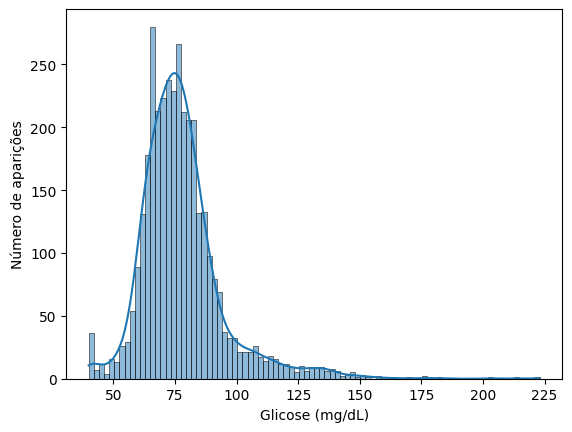

In [256]:
print('Quantidade de aparições dos valores medidos para glucose no fluido intersticial (mg/dL)')
sns.histplot(df_cgm['value'], kde=True)
plt.ylabel('Número de aparições')
plt.xlabel('Glicose (mg/dL)')

Quantidade de medições por dia da semana


Text(0.5, 0, 'Dia da semana')

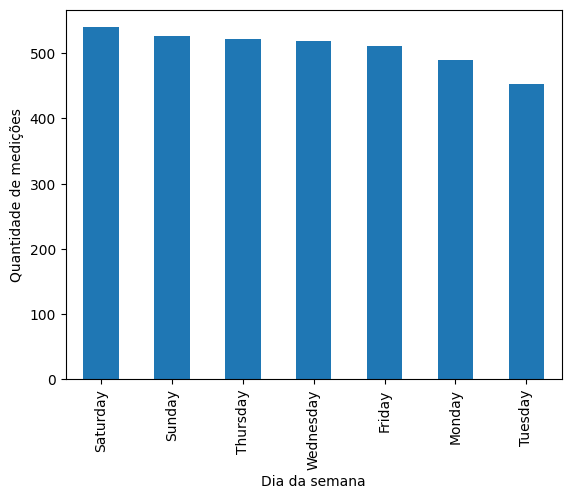

In [257]:
print('Quantidade de medições por dia da semana')
df_cgm['weekday'].value_counts().plot.bar()
plt.ylabel('Quantidade de medições')
plt.xlabel('Dia da semana')

Média das medições nos dias em que houve aferição


Text(0.5, 0, 'Data')

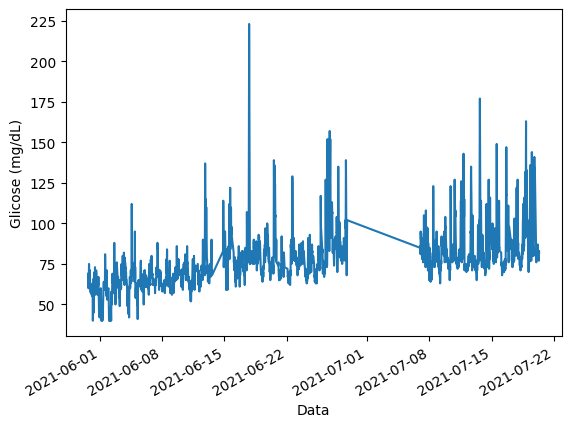

In [258]:
print('Média das medições nos dias em que houve aferição')
df_cgm.groupby('time')['value'].mean().plot()
plt.ylabel('Glicose (mg/dL)')
plt.xlabel('Data')

Número de medições por data


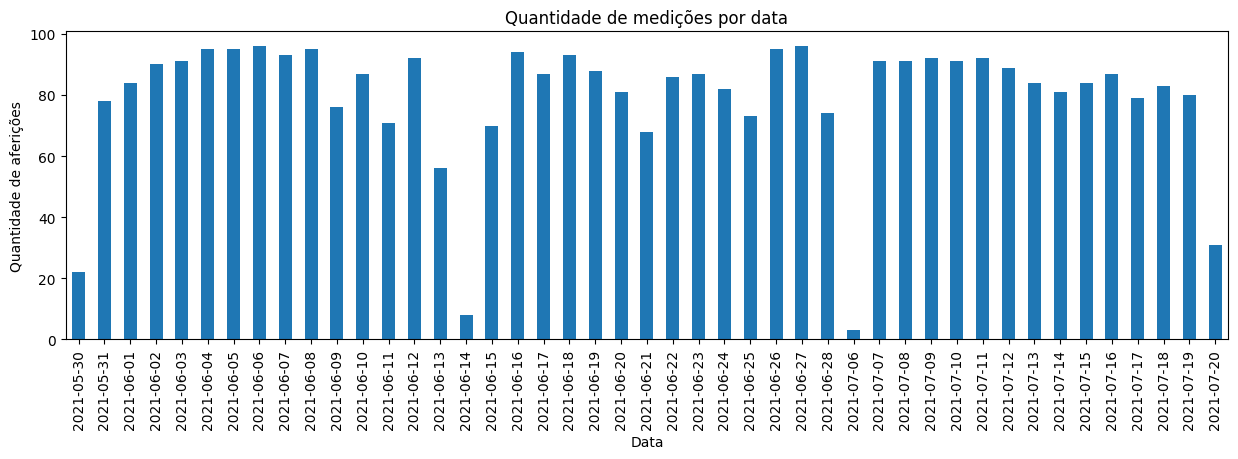

In [259]:
print('Número de medições por data')
df_cgm.groupby('date').size().plot(kind='bar', figsize=(15, 4), title='Quantidade de medições por data')
plt.ylabel('Quantidade de aferições')
plt.xlabel('Data')
plt.show()

## 1. Há relação entre o valor da glicemia (value) e o horário do dia (time)? Em quais horas do dia há maiores picos de glicemia? Em quais horas do dia há menores valores de glicemia? 


In [ ]:
# Valores de média, mínimo e máximo valores de glicemia (mg/dL) por hora do dia
df_cgm.groupby('hour')['value'].agg(['mean', 'min', 'max']).round(1)

In [ ]:
# Gráfico da média de glicemia por hora do dia 
media_por_hora = df_cgm.groupby('hour')['value'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=media_por_hora.index, y=media_por_hora.values)
plt.title('Média de glicemia por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Glicemia (mg/dL)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# 2. Nos dados analisados, qual a porcentagem do tempo o paciente está dentro, acima ou abaixo dos valores de referência ideais? 

##### Valores ideais:
##### TIR time in range: ≥ 70% do tempo entre 70-180 mg/dL
##### TBR time below range: < 4% do tempo abaixo de 70 mg/dL
##### TBR time very below range: < 1% abaixo de 54 mg/dL
##### TAR time above range: < 25% acima de 180 mg/dL

In [ ]:
total = len(df_cgm)
tar = len(df_cgm[df_cgm['value'] > 180]) / total * 100
tir = len(df_cgm[(df_cgm['value'] >= 70) & (df_cgm['value'] <= 180)]) / total * 100
tbr = len(df_cgm[df_cgm['value'] < 70]) / total * 100
tvbr = len(df_cgm[df_cgm['value'] < 54]) / total * 100

In [ ]:
tar_check = '✔️' if tar < 25 else '❌'
tir_check = '✔️' if tir >= 70 else '❌'
tbr_check = '✔️' if tbr < 4 else '❌'
tvbr_check = '✔️' if tvbr < 1 else '❌'

In [ ]:
print(f'| TAR time above range      | {tar:.1f}%  | < 25% acima de 180 mg/dL           | {tar_check} |')
print(f'| TIR time in range         | {tir:.1f}% |  ≥ 70% do tempo entre 70-180 mg/dL | {tir_check} |')
print(f'| TBR time below range      | {tbr:.1f}% | < 4% do tempo abaixo de 70 mg/dL   | {tbr_check} |')
print(f'| TBR time very below range | {tvbr:.1f}%  | < 1% abaixo de 54 mg/dL            | {tvbr_check} |')

# 3. Dentro do período de medição, houve algum dia em que a média de glicemia destoou muito do normal? Em quais momentos houve episódios de hiper (>180mg/dL) e hipoglicemia? (<70mg/dL)

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm

mapa_medicoes = df_cgm[['value']]
mapa_medicoes = mapa_medicoes.T

faixas = [0, 70, 180, df_cgm['value'].max() + 1]

# Cores suaves e harmônicas:
colors = ['#7DA6C1', '#A3C293', '#D46256']
cmap = ListedColormap(colors)
norm = BoundaryNorm(faixas, cmap.N)

# Plot
plt.figure(figsize=(20, 2))
sns.heatmap(mapa_medicoes, cmap=cmap, norm=norm, cbar_kws={'label': 'Glicose (mg/dL)'})
plt.yticks([], [])
plt.xlabel("Leituras")
plt.title("Mapa de calor com destaque para medições individuais acima de 180 e abaixo de 70")
plt.show()


# 4. Quão rápido a curva de glicemia tende a voltar para os valores de referência ideais? Há alguma variável que influencia o tempo de retorno?

# 5. Há diferença significativa da média de glicemia entre dias da semana? (dias úteis, fins de semana)

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm

tabela = df_cgm.pivot_table(index='hour', columns='weekday', values='value', aggfunc='mean')
max_val = df_cgm['value'].max()

colors = ['#E99A8B', '#A3C293', '#D46256'] 
glucose_range = [0, 70, 140, max_val + 1]

cmap = ListedColormap(colors)
norm = BoundaryNorm(glucose_range, cmap.N)

plt.figure(figsize=(6, 6))
sns.heatmap(tabela, annot=True, fmt=".1f", cmap=cmap, norm=norm, cbar_kws={'label': 'Glicose (mg/dL)'})
plt.title("Glicose média por hora do dia e por dia da semana")
plt.ylabel("Hora do dia")
plt.xlabel("Dia da semana")
plt.show()

In [ ]:
media_por_dia = df_cgm.groupby('weekday')['value'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

mapa_mediageral = pd.DataFrame([media_por_dia['value'].values], columns=media_por_dia['weekday'].values)

plt.figure(figsize=(8, 2))
sns.heatmap(mapa_mediageral, annot=True, fmt=".1f", cmap="crest", cbar_kws={'label': 'Glicose média (mg/dL)'})
plt.title("Média de glicose no fluido intersticial por dia da semana")
plt.yticks([], []) 
plt.xlabel("Dia da semana")
plt.show()


# 6. Há variação de glicemia significativa durante o período noturno e durante a manhã (4h-8h)? (dawn phenomenon)

In [ ]:
# Gráfico da média de glicemia por hora do dia 
media_por_hora = df_cgm.groupby('hour')['value'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=media_por_hora.index, y=media_por_hora.values)
plt.title('Média de glicemia por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Glicemia (mg/dL)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# 7. Qual a glicemia média geral do período analisado?

In [ ]:
media_global = df_cgm['value'].mean()
media_check = '✔️' if media_global > 70 and media_global < 180 else '❌'
print('Média geral:', media_global, media_check)

# 8. Qual o desvio padrão ou coeficiente de variação (CV%) da glicemia?

# 9. Quais dias em que houve mais instabilidade (maior variação)?

# 10. Há consistência nos dados? É possível prever quais horas do dia haverá oscilações significativas?

# 11. Há alguma diferença entre a média da primeira e última metade da amostra? Houve alguma diferença no controle ao longo do mês ou permaneceu constante?

In [ ]:
# 12. Número e duração média dos episódios de hipoglicemia e hiperglicemia
# 13. Velocidade média de subida e queda da glicemia
# 14. Tempo em hipoglicemia noturna (00h–6h)
# 17. Predição simples com regressão ou modelo de baseline

# Predição com regressão linear

In [ ]:
#%pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
x = df_cgm[['hour']]
y = df_cgm['value']

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)


In [ ]:
y_pred = modelo.predict(x_teste)
rmse = np.sqrt(mean_squared_error(y_teste, y_pred))

print("Coeficiente angular (slope):", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)
print("R²:", r2_score(y_teste, y_pred))
print("RMSE:", rmse)

In [ ]:
plt.scatter(x_teste, y_teste, color='gray', label='Real')
plt.plot(x_teste, y_pred, color='blue', linewidth=2, label='Previsão')
plt.title('Previsão da glicemia com base na hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Glicemia (mg/dL)')
plt.legend()
plt.grid(True)
plt.show()